In [1286]:
#importing necessary libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from scipy.stats import norm, stats
import statistics as st
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pickle



#import plotty
import warnings
warnings.filterwarnings('ignore')

In [1287]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')  #Reading the csv file
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [1288]:
df.drop(columns = 'Unnamed: 0', inplace = True) #Drop the unnecessary Column ['Unnamed']

In [1289]:
df #Now check our dataset

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [1290]:
df.describe() #To check the Quartile range and missing values

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [1291]:
df.info() #Check the type of each and every column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [1292]:
df.duplicated().sum() #Check there is any duplicate rows in our columns or not

0

In [1293]:
df.isnull().sum() #check the null values in our dataset

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [1294]:
df.shape #Check the shape of our dataset

(200, 4)

In [1295]:
# analyize the correlation between features and label.
corr = df.corr()
corr.shape

(4, 4)

<function matplotlib.pyplot.show(close=None, block=None)>

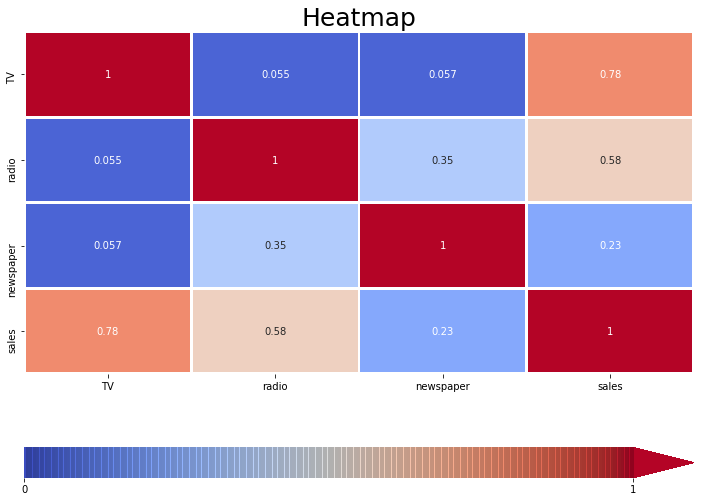

In [1296]:
# Visualize the corrrelation by using heatmap
cbar_kws = {"orientation":"horizontal", 
            "shrink":1,
            'extend':'max', 
            'extendfrac':0.1, 
            "ticks":np.arange(0,27), 
            "drawedges":True,
           }
plt.figure(figsize=(12,9))
sns.heatmap(corr, annot=True, linewidths = 2, cmap="coolwarm", cbar_kws=cbar_kws, vmax=1, vmin=0)
plt.title('Heatmap', fontsize = 25)
plt.show

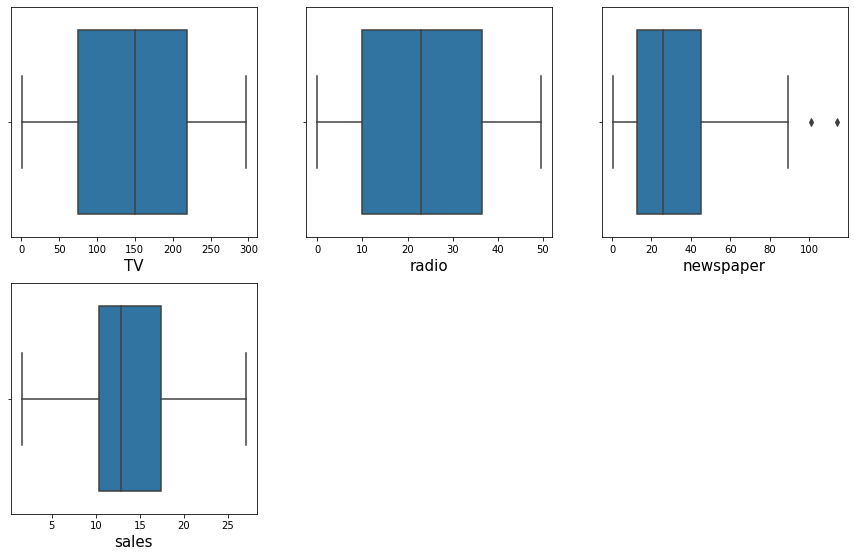

In [1297]:
#visaulize the columns by using boxplot
plt.figure(figsize =(15,50))
graph=1
for column in df:
    if graph<30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=15)
    graph+=1
plt.show()  

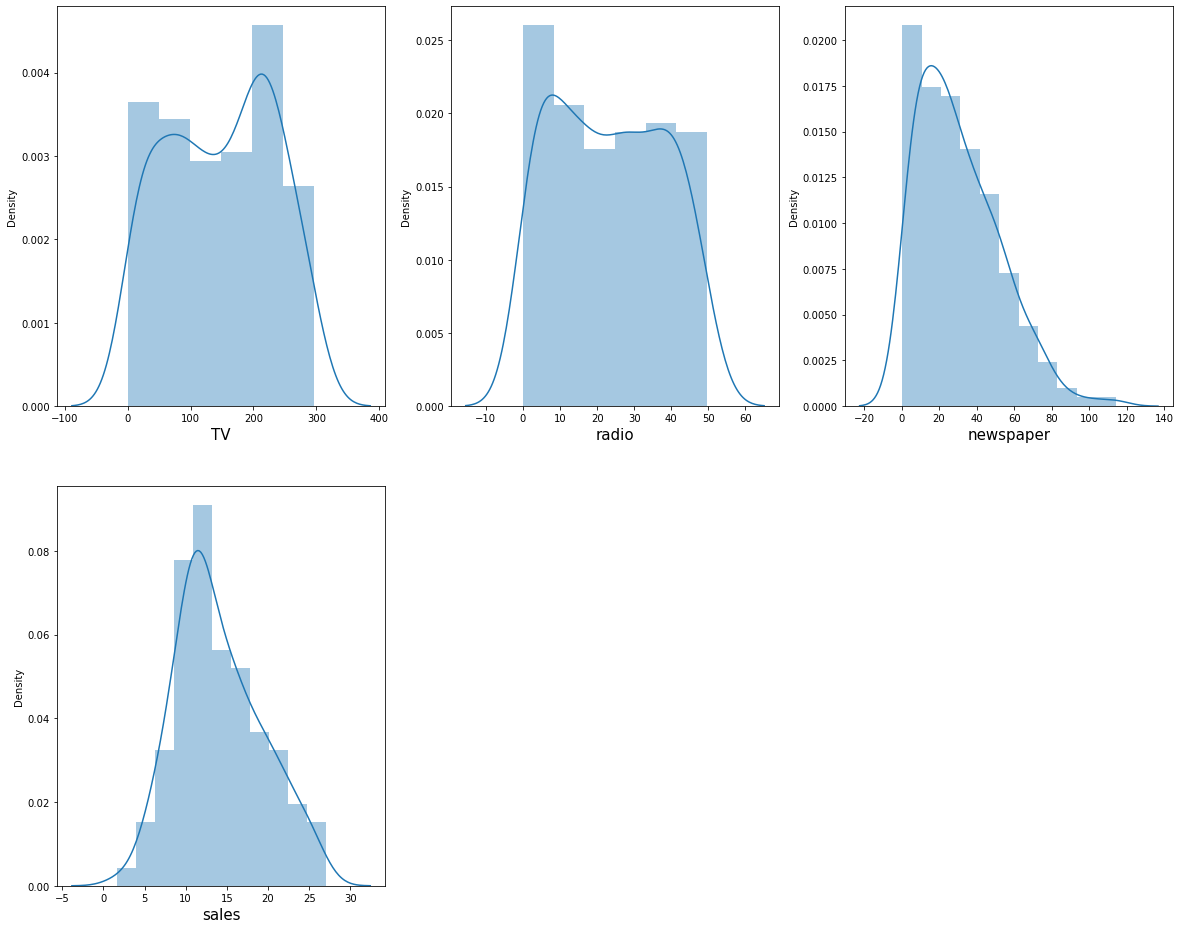

In [1298]:
#visaulize the columns by using distplot
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=15)
    plotnumber+=1
plt.show()

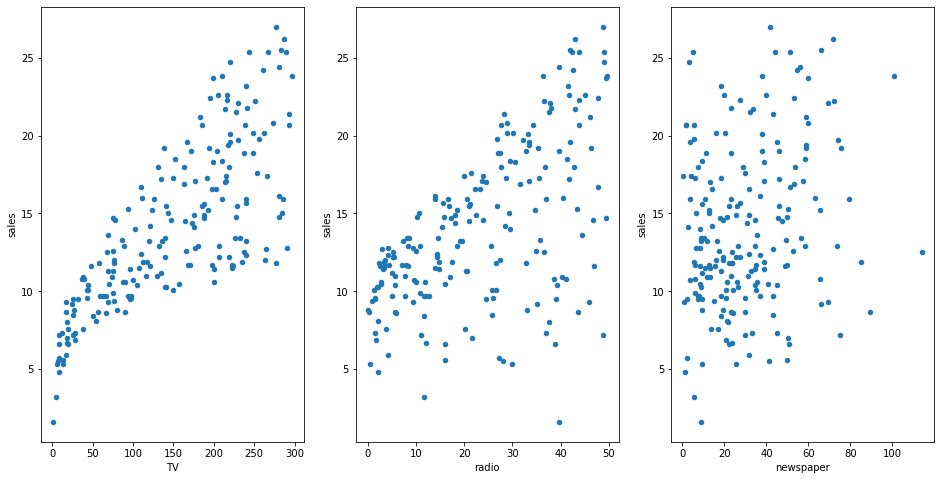

In [1299]:
#Visualize the relationship between feature and labels by using scatterplot
fig, axs = plt.subplots(1,3)
df.plot(kind='scatter', x = 'TV', y='sales', ax=axs[0], figsize = (16,8))
df.plot(kind='scatter', x = 'radio', y='sales', ax=axs[1])
df.plot(kind='scatter', x = 'newspaper', y='sales', ax=axs[2])
fig.savefig('scatterdata.jpg')

# Column1: TV

In [1302]:
df['TV'].unique()  #Check the unique element in this column

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 100.4, 216.4, 182.6, 262.7,
       198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3, 102.7,
       131.1,  69. ,  31.5, 139.3, 216.8, 199.1, 109.8,  26.8, 129.4,
       213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4, 239.8,  75.3,
        68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 134.3,  28.6, 217.7,
       250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4, 296.4,
       280.2, 187.9, 238.2, 137.9,  25. ,  90.4,  13.1, 255.4, 225.8,
       241.7, 175.7, 209.6,  78.2,  75.1, 139.2, 125.7,  19.4, 141.3,
        18.8, 224. , 123.1, 229.5,  87.2,   7.8,  80.2, 220.3,  59.6,
         0.7, 265.2,

In [1303]:
df['TV'].all() #check there is any zero value or not

True

In [1304]:
df['TV'].value_counts() #Count the particular value of every data in this column

76.4     2
17.2     2
240.1    2
197.6    2
184.9    2
        ..
117.2    1
289.7    1
137.9    1
220.5    1
13.1     1
Name: TV, Length: 190, dtype: int64

In [1305]:
df['TV'].isna().sum() #Check the null value of the column

0

Text(0.5, 0, 'TV')

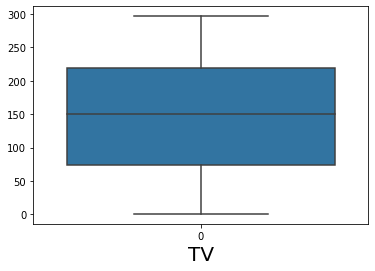

In [1306]:
#Check the outliers by using the boxplot
sns.boxplot(data = df['TV'])
plt.xlabel('TV', fontsize=20)

In [1307]:
#Find the mean, std, median and mode of the Column 'TV'
TV_mean = df.TV.mean()
print('Mean of the Column "TV" is ------>',TV_mean)
TV_std = df.TV.std()
print('Std of the Column "TV" is ------>', TV_std)
TV_median = df.TV.median()
print('Median of the Column "TV" is ------>', TV_median)
TV_mode = st.mode(df['TV'])
print('Mode of the Column "TV" is ------->', TV_mode)

Mean of the Column "TV" is ------> 147.0425
Std of the Column "TV" is ------> 85.8542363149081
Median of the Column "TV" is ------> 149.75
Mode of the Column "TV" is -------> 17.2


In [1308]:
df['TV'].describe()

count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64

Text(0, 0.5, 'counts')

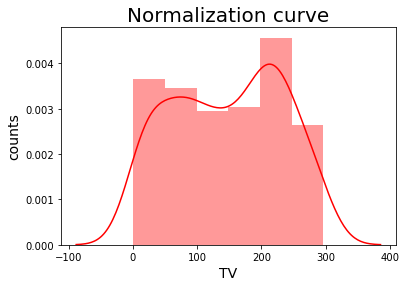

In [1310]:
# using distplot for normalization curve
sns.distplot(df['TV'], color='red', rug = False, hist = True, kde = True)
plt.title('Normalization curve', fontsize=20)
plt.xlabel('TV', fontsize=14)
plt.ylabel('counts', fontsize=14)

Text(0, 0.5, 'counts')

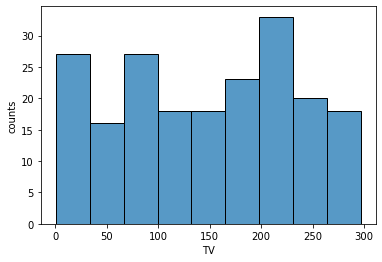

In [1311]:
sns.histplot(data = df['TV']) # visualize by using histplot
plt.ylabel('counts')

In [1312]:
df.shape

(200, 4)

# Column2: 'Radio'

In [1313]:
df['radio'].unique() #Check the unique element in this column

array([37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6,  2.1,  2.6,  5.8,
       24. , 35.1,  7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7,  5.1,
       15.9, 16.9, 12.6,  3.5, 29.3, 16.7, 27.1, 16. , 28.3, 17.4,  1.5,
       20. ,  1.4,  4.1, 43.8, 49.4, 26.7, 37.7, 22.3, 33.4,  8.4, 25.7,
       22.5,  9.9, 41.5, 15.8, 11.7,  3.1,  9.6, 41.7, 46.2, 28.8, 28.1,
       19.2, 49.6, 29.5,  2. , 42.7, 15.5, 29.6, 42.8,  9.3, 24.6, 14.5,
       27.5, 43.9, 30.6, 14.3, 33. ,  5.7, 43.7,  1.6, 28.5, 29.9,  7.7,
       20.3, 44.5, 43. , 18.4, 40.6, 25.5, 47.8,  4.9, 33.5, 36.5, 14. ,
       31.6, 21. , 42.3,  4.3, 36.3, 10.1, 17.2, 34.3, 46.4, 11. ,  0.3,
        0.4, 26.9,  8.2, 38. , 15.4, 20.6, 46.8, 35. ,  0.8, 36.9, 26.8,
       21.7,  2.4, 34.6, 32.3, 11.8, 38.9,  0. , 49. , 12. ,  2.9, 27.2,
       38.6, 47. , 39. , 28.9, 25.9, 17. , 35.4, 33.2, 14.8,  1.9,  7.3,
       40.3, 25.8, 13.9, 23.3, 39.7, 21.1, 11.6, 43.5,  1.3, 18.1, 35.8,
       36.8, 14.7,  3.4, 37.6,  5.2, 23.6, 10.6, 20

In [1314]:
df['radio'].all() #Check any zero value exist in our column

False

In [1318]:
df['radio'].describe() # check the mean of this column

count    200.000000
mean      23.380320
std       14.754473
min        0.300000
25%       10.075000
50%       23.282000
75%       36.525000
max       49.600000
Name: radio, dtype: float64

In [1319]:
df['radio']= df['radio'].replace(0,df['radio'].mean()) # replace the zero value by column mean

In [1320]:
df['radio'].all() # Now, it's showing True, it means there is no zero value in this column.

True

In [1321]:
df['radio'].isnull().sum() # Check there is any null value or not, it is showing zero, it means there is no null value

0

In [1322]:
df['radio'].value_counts() #Count the particular value of every data in this column

4.1     3
5.7     3
39.6    2
2.6     2
41.7    2
       ..
8.6     1
11.8    1
45.1    1
23.3    1
33.4    1
Name: radio, Length: 167, dtype: int64

Text(0.5, 0, 'Radio')

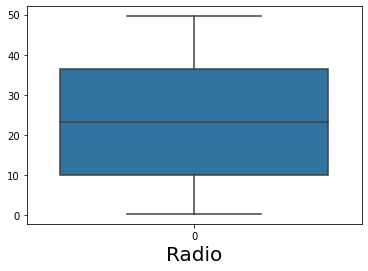

In [1323]:
#Visualize the outliers by using Boxplot
sns.boxplot(data = df['radio'])
plt.xlabel('Radio', fontsize=20)

Text(0, 0.5, 'sales')

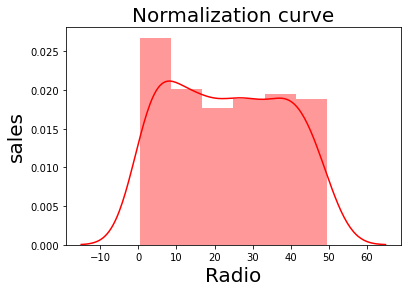

In [1324]:
#Visualize the normalization curve by using distplot
sns.distplot(df['radio'], color= 'red', kde = True, hist = True)
plt.title('Normalization curve', fontsize = 20)
plt.xlabel('Radio', fontsize = 20)
plt.ylabel('sales', fontsize = 20)

In [1325]:
#Find the mean, std, median and mode of the Column 'TV'
radio_mean = df.radio.mean()
print('Mean of the Column "Radio" is ------>',radio_mean)
Radio_std = df.radio.std()
print('Std of the Column "Radio" is ------>', Radio_std)
Radio_median = df.radio.median()
print('Median of the Column "TV" is ------>', Radio_median)
Radio_mode = st.mode(df['radio'])
print('Mode of the Column "radio" is ----->', Radio_mode)

Mean of the Column "Radio" is ------> 23.380320000000026
Std of the Column "Radio" is ------> 14.754473137507391
Median of the Column "TV" is ------> 23.28200000000001
Mode of the Column "radio" is -----> 4.1


In [1326]:
(df['radio']).describe()

count    200.000000
mean      23.380320
std       14.754473
min        0.300000
25%       10.075000
50%       23.282000
75%       36.525000
max       49.600000
Name: radio, dtype: float64

<AxesSubplot:xlabel='radio', ylabel='Count'>

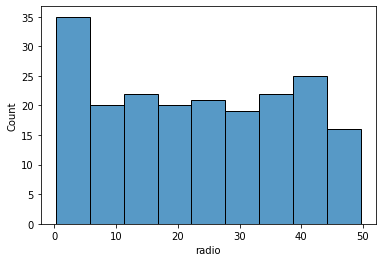

In [1327]:
sns.histplot( data = df['radio'])

In [1328]:
df.shape

(200, 4)

# Column3: 'Newspaper'

In [1329]:
df['newspaper'].unique()   #Check the unique element in this column

array([ 69.2,  45.1,  69.3,  58.5,  58.4,  75. ,  23.5,  11.6,   1. ,
        21.2,  24.2,   4. ,  65.9,   7.2,  46. ,  52.9, 114. ,  55.8,
        18.3,  19.1,  53.4,  49.6,  26.2,  19.5,  12.6,  22.9,  40.8,
        43.2,  38.6,  30. ,   0.3,   7.4,   8.5,   5. ,  45.7,  35.1,
        32. ,  31.6,  38.7,   1.8,  26.4,  43.3,  31.5,  35.7,  18.5,
        49.9,  36.8,  34.6,   3.6,  39.6,  58.7,  15.9,  60. ,  41.4,
        16.6,  37.7,   9.3,  21.4,  54.7,  27.3,   8.4,  28.9,   0.9,
         2.2,  10.2,  11. ,  27.2,  31.7,  19.3,  31.3,  13.1,  89.4,
        20.7,  14.2,   9.4,  23.1,  22.3,  36.9,  32.5,  35.6,  33.8,
        65.7,  16. ,  63.2,  73.4,  51.4,  33. ,  59. ,  72.3,  10.9,
         5.9,  22. ,  51.2,  45.9,  49.8, 100.9,  17.9,   5.3,  29.7,
        23.2,  25.6,   5.5,  56.5,   2.4,  10.7,  34.5,  52.7,  14.8,
        79.2,  46.2,  50.4,  15.6,  12.4,  74.2,  25.9,  50.6,   9.2,
         3.2,  43.1,   8.7,  43. ,   2.1,  65.6,  59.7,  20.5,   1.7,
        12.9,  75.6,

In [1330]:
df['newspaper'].all() #Check any zero value exist in our column

True

In [1342]:
df['newspaper'].isnull().sum() # Check there is any null value or not, it is showing zero, it means there is no null value

0

In [1343]:
df['newspaper'].value_counts() #Count the particular value of every data in this column

9.3     3
8.7     3
25.6    3
6.4     2
31.6    2
       ..
2.4     1
13.8    1
1.8     1
57.6    1
19.4    1
Name: newspaper, Length: 167, dtype: int64

Text(0.5, 0, 'Newspaper')

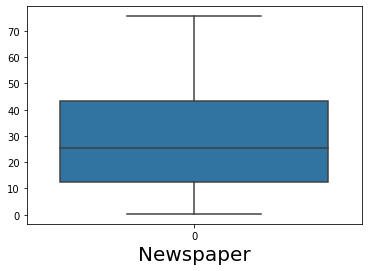

In [1344]:
sns.boxplot(data = df['newspaper'])
plt.xlabel('Newspaper', fontsize = 20)

Text(0, 0.5, 'counts')

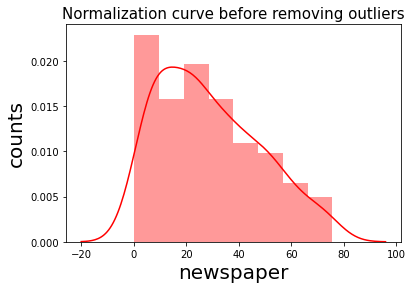

In [1345]:
#Visualize the normalization curve by using distplot
sns.distplot(df['newspaper'], color= 'red', kde = True, hist = True)
plt.title('Normalization curve before removing outliers', fontsize = 15)
plt.xlabel('newspaper', fontsize = 20)
plt.ylabel('counts', fontsize = 20)

In [1346]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['newspaper'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['newspaper'], 70,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [1347]:
# higher side 
higher_side = df['newspaper'] >= (q3+1.5*iqr)
print("newspaper:", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side 
lower_side = df['newspaper'] <= (q1-1.5*iqr)
print("Lower:", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df.shape)

newspaper: 0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: newspaper, Length: 195, dtype: bool
(array([], dtype=int64),)
Lower: 0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: newspaper, Length: 195, dtype: bool
(array([], dtype=int64),)
old Shape:  (195, 4)


In [1348]:
#removing the outliers
df = df.drop(df.index[high])
df = df.drop(df.index[low])
 
print("New Shape: ", df.shape)

New Shape:  (195, 4)


<AxesSubplot:>

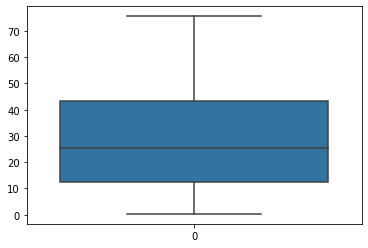

In [1349]:
sns.boxplot(data=df['newspaper'])

Text(0, 0.5, 'counts')

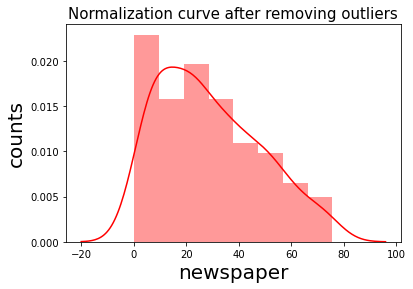

In [1350]:
#Visualize the normalization curve by using distplot
sns.distplot(df['newspaper'], color= 'red', kde = True, hist = True)
plt.title('Normalization curve after removing outliers', fontsize = 15)
plt.xlabel('newspaper', fontsize = 20)
plt.ylabel('counts', fontsize = 20)

In [1351]:
df['newspaper'].describe()

count    195.000000
mean      28.935897
std       19.423799
min        0.300000
25%       12.500000
50%       25.600000
75%       43.150000
max       75.600000
Name: newspaper, dtype: float64

In [1352]:
#Find the mean, std, median and mode of the Column 'TV'
newspaper_mean = df.newspaper.mean()
print('Mean of the Column "newspaper" is ------>',newspaper_mean)
newspaper_std = df.newspaper.std()
print('Std of the Column "newspaper" is ------>', newspaper_std)
newspaper_median = df.newspaper.median()
print('Median of the Column "newspaper" is ------>', newspaper_median)
newspaper_mode = st.mode(df['newspaper'])
print('Mode of the Column "newspaper" is -------> ', newspaper_mode)

Mean of the Column "newspaper" is ------> 28.935897435897427
Std of the Column "newspaper" is ------> 19.423798867977734
Median of the Column "newspaper" is ------> 25.6
Mode of the Column "newspaper" is ------->  9.3


In [1353]:
df.shape # now shape of the dataset is changed 

(195, 4)

# Label: 'sales'

In [1355]:
df['sales'].unique() #Check the unique element in this column

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 24.4, 11.3, 14.6, 18. , 12.5,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  6.9, 14.2,
        5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4, 22.2,
       11.5, 16.9, 11.7, 17.2, 19.2,  8.7, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

In [1356]:
df['sales'].all() #check there is any zero value or not

True

In [1357]:
df['sales'].isnull().sum() # Check there is any null value or not, it is showing zero, it means there is no null value

0

In [1358]:
df['sales'].value_counts() #Count the particular value of every data in this column

9.7     5
11.7    4
12.9    4
11.6    3
15.5    3
       ..
21.7    1
14.5    1
21.2    1
22.1    1
20.8    1
Name: sales, Length: 121, dtype: int64

In [1359]:
df['sales'].describe()

count    195.000000
mean      14.008718
std        5.218344
min        1.600000
25%       10.350000
50%       12.900000
75%       17.400000
max       27.000000
Name: sales, dtype: float64

Text(0.5, 0, 'sales')

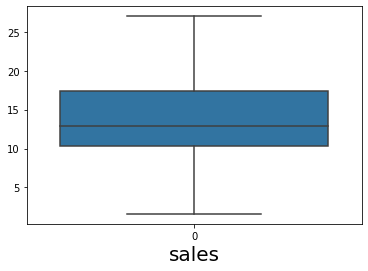

In [1360]:
#Visualize the outliers by using Boxplot
sns.boxplot(data = df['sales'])
plt.xlabel('sales', fontsize=20)

Text(0, 0.5, 'counts')

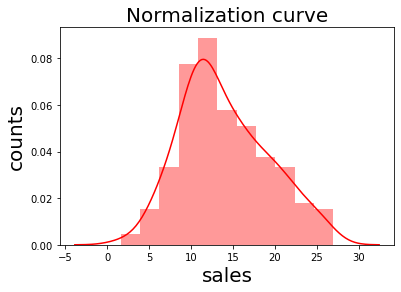

In [1361]:
#Visualize the normalization curve by using distplot
sns.distplot(df['sales'], color= 'red', kde = True, hist = True)
plt.title('Normalization curve', fontsize = 20)
plt.xlabel('sales', fontsize = 20)
plt.ylabel('counts', fontsize = 20)

In [1362]:
#Find the mean, std, median and mode of the Column 'TV'
sales_mean = df.sales.mean()
print('Mean of the Column "sales" is ------>',sales_mean)
sales_std = df.sales.std()
print('Std of the Column "sales" is ------>', sales_std)
sales_median = df.sales.median()
print('Median of the Column "TV" is ------>', sales_median)
sales_mode = st.mode(df['sales'])
print('Mode of the Column "sales" is ------> ', sales_mode)

Mean of the Column "sales" is ------> 14.00871794871795
Std of the Column "sales" is ------> 5.218343527654569
Median of the Column "TV" is ------> 12.9
Mode of the Column "sales" is ------>  9.7


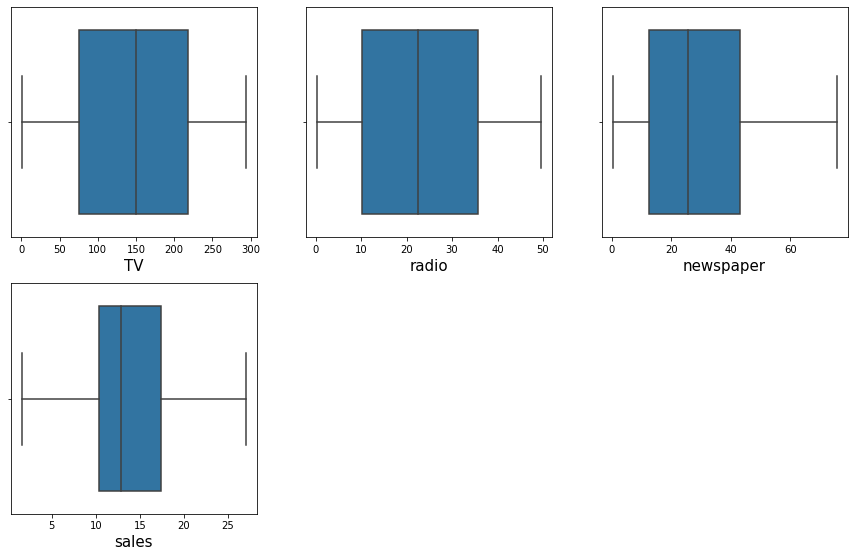

In [1363]:
#visaulize the columns by using boxplot
plt.figure(figsize =(15,50))
graph=1
for column in df:
    if graph<30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=15)
    graph+=1
plt.show() 

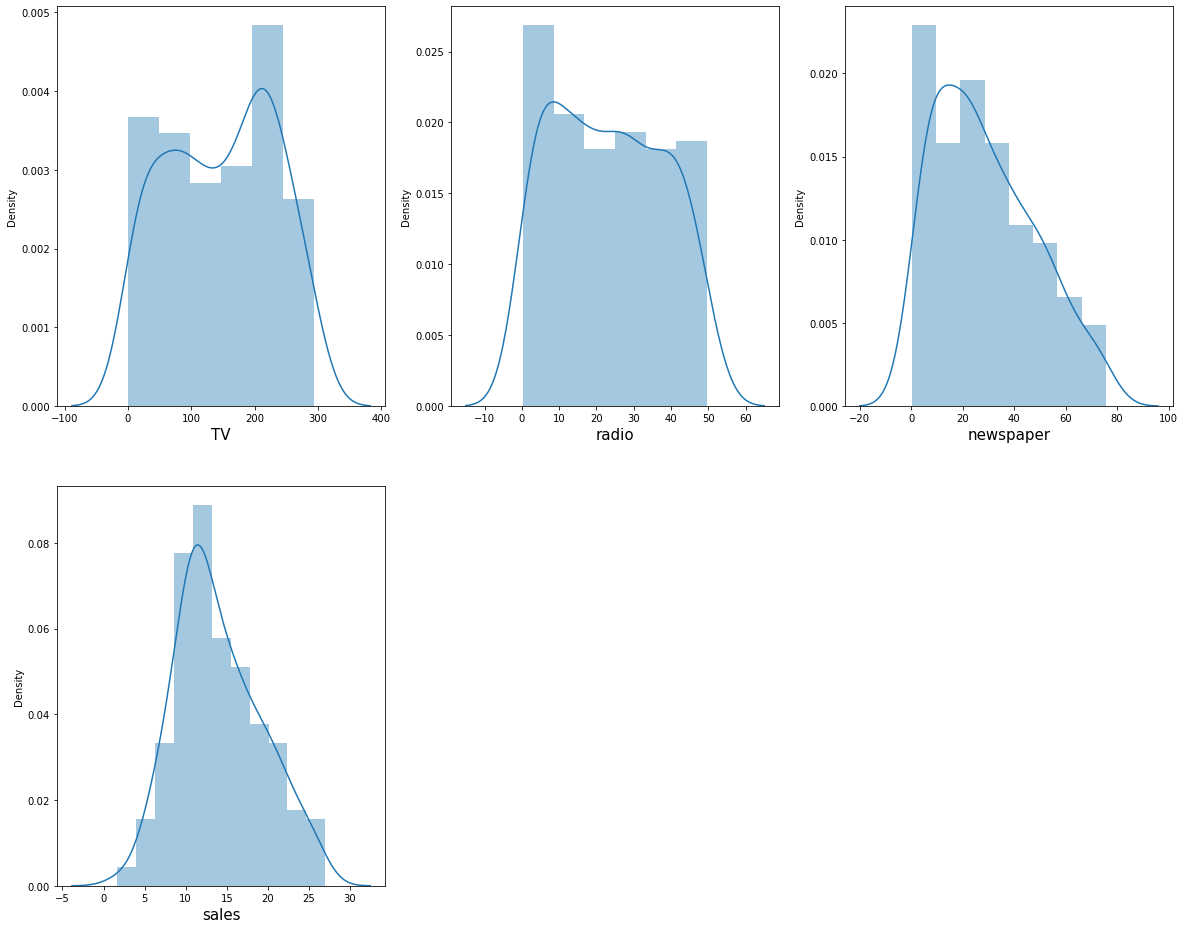

In [1364]:
#visaulize the columns by using distplot
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=15)
    plotnumber+=1
plt.show()

# Using Multiple Linear Regression 

In [1374]:
# Using Multiple Linear Regression to find the value of r2 square, model confidence, p-value
x = df[['TV','radio','newspaper']]
y=df[['sales']]

In [1375]:
x.shape #check the shape of features

(195, 3)

In [1376]:
y.shape #check the shape of the labels

(195, 1)

In [1377]:
lm = LinearRegression()

In [1378]:
lm.fit(x,y)

LinearRegression()

In [1379]:
print ('Intercept and coefficient')
print('Intercept ----->', lm.intercept_)
print('Coeficient of TV , radio, newspaper ----->' , lm.coef_[0])

Intercept and coefficient
Intercept -----> [2.81923309]
Coeficient of TV , radio, newspaper -----> [0.04568306 0.18751346 0.00442003]


In [1380]:
#check the model confidence
lm = smf.ols(formula ='sales~ TV + radio + newspaper', data = df).fit()
lm.conf_int()

,0,1
Intercept,2.191353,3.447114
TV,0.042887,0.048479
radio,0.170227,0.204800
newspaper,-0.008670,0.017510


In [1381]:
lm.summary() # to check the rsquared value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     560.5
Date:                Sat, 25 Dec 2021   Prob (F-statistic):           2.20e-94
Time:                        23:56:03   Log-Likelihood:                -375.80
No. Observations:                 195   AIC:                             759.6
Df Residuals:                     191   BIC:                             772.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8192      0.318      8.857      0.000       2.191       3.447
TV             0.0457      0.001     32.228      0.000       0.043       0.048
radio          0.1875      0.009     21.397      0.000       0.170       0.205
newspaper      0.0044      0.007      0.666      0.506      -0.009       0.018
==============================================================================
Omnibus:                       59.986   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.483
Skew:                          -1.341   Prob(JB):                     1.28e-33
Kurtosis:                       6.383   Cond. No.                         458.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1382]:
# pvalue of newspaper is not less than 0.05, so, we reject the null hypothesis that newspaper is related to sales

In [1383]:
#check the model confidence with only two features( TV and radio)
lm = smf.ols(formula ='sales~ TV + radio ', data = df).fit()
lm.rsquared

0.8977616971696134

In [1384]:
#check the model confidence with all features
lm = smf.ols(formula ='sales~ TV + radio + newspaper', data = df).fit()
lm.rsquared

0.8979985852414586

In [1385]:
#we see here, newspaper doesnot make any significant effect on sales 
#because r2 square value of all features and r2square value of two fveatures (TV, radio) doesnot have much change.

In [1386]:
#scale the value x
Scaler = StandardScaler()
x_scaled = Scaler.fit_transform(x)
x_scaled

array([[ 9.76020685e-01,  9.96791830e-01,  2.07826198e+00],
       [-1.20417229e+00,  1.09902829e+00,  8.34322327e-01],
       [-1.52485800e+00,  1.54886870e+00,  2.08342355e+00],
       [ 5.27277551e-02,  1.23534356e+00,  1.52597342e+00],
       [ 3.96906926e-01, -8.43464407e-01,  1.52081184e+00],
       [-1.62470520e+00,  1.75334162e+00,  2.37763335e+00],
       [-1.05146481e+00,  6.56003638e-01, -2.80577940e-01],
       [-3.14944875e-01, -2.43677189e-01, -8.94805402e-01],
       [-1.62587988e+00, -1.43643586e+00, -1.44193238e+00],
       [ 6.20094785e-01, -1.40235704e+00, -3.99294172e-01],
       [-9.50442935e-01, -1.18425260e+00, -2.44446913e-01],
       [ 7.95121053e-01,  5.62164202e-02, -1.28708513e+00],
       [-1.44732959e+00,  8.12766206e-01,  1.90792999e+00],
       [-5.81595632e-01, -1.06156885e+00, -1.12191472e+00],
       [ 6.70605721e-01,  6.62819402e-01,  8.80776505e-01],
       [ 5.68409175e-01,  1.67155245e+00,  1.23692520e+00],
       [ 1.57862790e+00,  1.11947558e+00

In [1387]:
# Check the multicollinearity between the features
#import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]= [ variance_inflation_factor(x_scaled, i)
               for i in range ( x_scaled.shape[1])]
vif['features']= x.columns
vif #less corelation between the features

,vif,features
0,1.006489,TV
1,1.142733,radio
2,1.142643,newspaper


In [1388]:
#check the shape of x and y
print('shape of x ------>', x.shape)
print('shape of y ------>', y.shape)

shape of x ------> (195, 3)
shape of y ------> (195, 1)


In [1389]:
#split data into train and test.
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size = 0.25, random_state=42)

In [1390]:
y_train.head()

,sales
66,9.5
107,8.7
163,18.0
80,11.8
78,5.3


# LinearRegression

In [1391]:
#Model instantiating and training
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [1392]:
#How much my model learn ( model confidence)
lr.score(x_train, y_train)

0.899663283081576

In [1393]:
#Let's check how well model fits the test data
lr.score(x_test,y_test)

0.8870217375625356

In [1395]:
y_pred = lr.predict(x_test)

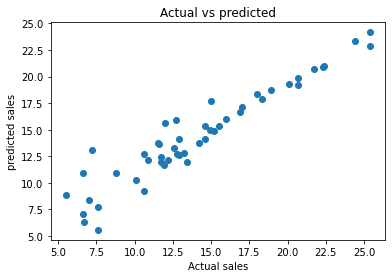

In [1397]:
#plot the actual and predicted value
plt.scatter(y_test,y_pred)
plt.xlabel('Actual sales')
plt.ylabel('predicted sales')
plt.title('Actual vs predicted')
plt.show()

<AxesSubplot:ylabel='Count'>

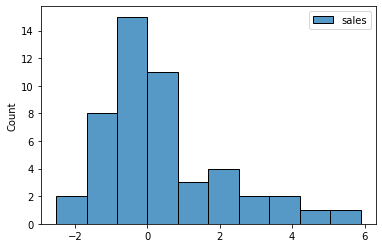

In [1398]:
#show residuals on histogram
residual = (y_pred - y_test)
sns.histplot(data = residual)

# Model Evaluation

In [1400]:
#calculate Mean absolute error
y_pred = lr.predict(x_test)
mean_absolute_error(y_test, y_pred)

1.218560881647093

In [1401]:
#calculate mean squared error
mean_squared_error(y_test,y_pred)

3.019053971601285

In [1402]:
#calculate root mean square error
np.sqrt(mean_squared_error(y_test,y_pred))

1.737542509293308

# Lasso Regression

In [1403]:
#import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [1404]:
#to find best alpha
lassocv= LassoCV(alphas=None, max_iter = 1000, normalize = True)

In [1405]:
#train the model
lassocv.fit(x_train,y_train)

LassoCV(normalize=True)

In [1406]:
#best alpha parameter
alpha = lassocv.alpha_
alpha

0.0007375266737421895

In [1407]:
#fit the data
lasso_reg = Lasso(alpha)

In [1408]:
lasso_reg.fit(x_train,y_train) #train the data

Lasso(alpha=0.0007375266737421895)

In [1409]:
lasso_reg.score(x_test,y_test) #get the score of test data

0.8870070882326537

# Ridge regression

In [1410]:
ridgecv= RidgeCV(alphas=np.arange(0.001,0.1,0.01), normalize = True)

In [1411]:
#train the data
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [1412]:
#best alpha parameter
ridgecv.alpha_

0.001

In [1413]:
#fit the data
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [1414]:
ridge_model.score(x_test,y_test) #get the score

0.8870204813120982

# Ada boost Regreesor

In [1415]:
ada = AdaBoostRegressor() #using this to improve accuracy

In [1416]:
ada_model= ada.fit(x_train,y_train) # fit the data

In [1417]:
y_pred = ada_model.predict(x_test) #predict it

In [1418]:
r2_score(y_test,y_pred) #get the r2score

0.9571460753475473

Hyperparameter tuning by using Linear Regression and Decision Tree to improve accuracy

In [1419]:
from sklearn.tree import DecisionTreeRegressor

In [1420]:
lr = LinearRegression()

In [1421]:
params = {'n_estimators': [40,47,49,50], 'learning_rate' :[.30,.40,.45]}

In [1422]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor(), cv =5, param_distributions = params ) #using randomsearchCv

In [1423]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45],
                                        'n_estimators': [40, 47, 49, 50]})

In [1424]:
rnd_srch.best_estimator_ 

AdaBoostRegressor(learning_rate=0.45)

In [1425]:
ada = AdaBoostRegressor( base_estimator = lr, learning_rate = 0.45, n_estimators = 47) #first by using linear regression

In [1426]:
ada.fit(x_train,y_train) #fit the data

AdaBoostRegressor(base_estimator=LinearRegression(), learning_rate=0.45,
                  n_estimators=47)

In [1427]:
y_pred = ada.predict(x_test) #predict it

In [1428]:
r2_score(y_test,y_pred) #get the score

0.8881051743861669

In [1429]:
dt = DecisionTreeRegressor() #now by using decision tree

In [1430]:
ada = AdaBoostRegressor( base_estimator = dt, learning_rate = 0.45, n_estimators = 47)

In [1431]:
ada.fit(x_train,y_train) #fit the data

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=0.45,
                  n_estimators=47)

In [1432]:
y_pred = ada.predict(x_test) #predict it

In [1433]:
r2_score(y_test,y_pred) #get the score

0.9674430834144839

# Xgb Boost

In [1434]:
import xgboost as xgb #import libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [1435]:
xgbr = xgb.XGBRegressor()  #to improve accuracy
xgbr.fit(x_train,y_train)
y_pred = xgbr.predict(x_test)
r2_score(y_test, y_pred)

0.9644986846787034

# GradientBoostingRegressor

In [1436]:
gradientregressor = GradientBoostingRegressor(max_depth=3, n_estimators=6, learning_rate=.4) #using GBR

In [1437]:
gbr = gradientregressor.fit(x_train,y_train) #fit the data

In [1438]:
r2_score(y_test,y_pred) #predict it 

0.9644986846787034

In [1439]:
from sklearn.model_selection import GridSearchCV #import libraries

In [1441]:
grid_params = {
    'max_depth': range(4,12,2),
    'learning_rate': np.arange(0.1,1,0.1),
    'min_samples_split': range(4,8,2)
}

In [1442]:
grid = GridSearchCV(gbr, param_grid = grid_params)

In [1443]:
grid.fit(x_train, y_train) #fit the data

GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.4,
                                                 n_estimators=6),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(4, 12, 2),
                         'min_samples_split': range(4, 8, 2)})

In [1444]:
grid.best_params_ # get the best parameters

{'learning_rate': 0.6, 'max_depth': 6, 'min_samples_split': 4}

In [1445]:
a = grid.best_estimator_

In [1446]:
a.fit(x_train,y_train) # fit the data

GradientBoostingRegressor(learning_rate=0.6, max_depth=6, min_samples_split=4,
                          n_estimators=6)

In [1447]:
y_pred = a.predict(x_test) # predict it

In [1448]:
r2_score(y_test, y_pred) # get the improved r2 score

0.9646246419009902

# saving the model

In [1449]:
with open('Adv_sales_channel_pred_model','wb') as f: #finally, svaing the model
    pickle.dump(regression,f)